In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [5]:
df1=pd.read_csv("NYC Housing.csv")
df1.head()

,type,location,bed,address,total_sqft,bath,price
0,Condo for sale,Manhattan,2,2 E 55th St Unit 803,1400,2.000000,315000
1,Condo for sale,New York County,7,Central Park Tower Penthouse-217 W 57th New Yo...,17545,10.000000,195000000
2,House for sale,Richmond County,4,620 Sinclair Ave,2015,2.000000,260000
3,Condo for sale,New York County,3,2 E 55th St Unit 908W33,445,1.000000,69000
4,Townhouse for sale,New York County,7,5 E 64th St,14175-15000,2.373861,55000000


In [6]:
df1.shape

(4801, 7)

In [7]:
df1.groupby('type')['type'].agg('count')

type
Co-op for sale                1450
Coming Soon                      2
Condo for sale                 891
Condop for sale                  5
Contingent                      88
For sale                        20
Foreclosure                     14
House for sale                1012
Land for sale                   49
Mobile house for sale            1
Multi-family home for sale     727
Pending                        243
Townhouse for sale             299
Name: type, dtype: int64

In [8]:
df2 = df1.drop(['type','address'],axis='columns')
df2.shape

(4801, 5)

In [9]:
df2.head()

,location,bed,total_sqft,bath,price
0,Manhattan,2,1400,2.000000,315000
1,New York County,7,17545,10.000000,195000000
2,Richmond County,4,2015,2.000000,260000
3,New York County,3,445,1.000000,69000
4,New York County,7,14175-15000,2.373861,55000000


In [10]:
df2.isnull().sum()

location      0
bed           0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df2['bed'].unique()

array(['2', '7', '4', '3', '5 BHK', '8', '1', '2 Bedroom', '6', '12',
       '10', '5', '11', '4 Beds', '9', '15', '14', '16', '20', '35', '24',
       '50', '13', '32', '36', '42', '40', '30', '19', '18'], dtype=object)

In [12]:
df2['bhk'] = df2['bed'].apply(lambda x: int(x.split(' ')[0]))
df2.bhk.unique()

array([ 2,  7,  4,  3,  5,  8,  1,  6, 12, 10, 11,  9, 15, 14, 16, 20, 35,
       24, 50, 13, 32, 36, 42, 40, 30, 19, 18], dtype=int64)

In [17]:
df2['total_sqft'].unique()

array(['1400', '17545', '2015', ..., '7854', '903', '655'], dtype=object)

In [23]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [25]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,bed,total_sqft,bath,price,bhk
4,New York County,7,14175-15000,2.373861,55000000,7
54,Manhattan,2,1300-1350,2.000000,3250000,2


In [27]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [30]:
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)
df3 = df3[df3.total_sqft.notnull()]
df3.head()

,location,bed,total_sqft,bath,price,bhk
0,Manhattan,2,1400.0,2.000000,315000,2
1,New York County,7,17545.0,10.000000,195000000,7
2,Richmond County,4,2015.0,2.000000,260000,4
3,New York County,3,445.0,1.000000,69000,3
4,New York County,7,14587.5,2.373861,55000000,7


In [32]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']/df4['total_sqft']
df4.head()

,location,bed,total_sqft,bath,price,bhk,price_per_sqft
0,Manhattan,2,1400.0,2.000000,315000,2,225.000000
1,New York County,7,17545.0,10.000000,195000000,7,11114.277572
2,Richmond County,4,2015.0,2.000000,260000,4,129.032258
3,New York County,3,445.0,1.000000,69000,3,155.056180
4,New York County,7,14587.5,2.373861,55000000,7,3770.351328


In [34]:
df4['price'] = df4['price'].apply(lambda x: round(x, 2))
df4['price_per_sqft'] = df4['price_per_sqft'].apply(lambda x: round(x, 2))
df4['bath'] = df4['bath'].round(0).astype(int)

In [36]:
df5=df4.copy()
df5.head()

,location,bed,total_sqft,bath,price,bhk,price_per_sqft
0,Manhattan,2,1400.0,2,315000,2,225.00
1,New York County,7,17545.0,10,195000000,7,11114.28
2,Richmond County,4,2015.0,2,260000,4,129.03
3,New York County,3,445.0,1,69000,3,155.06
4,New York County,7,14587.5,2,55000000,7,3770.35


In [38]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
New York            1016
Kings County         727
Queens County        684
Queens               555
Richmond County      480
Brooklyn             464
Bronx County         307
New York County      286
The Bronx            184
Staten Island         59
Manhattan             21
Riverdale              4
Flushing               4
Coney Island           3
East Bronx             1
Brooklyn Heights       1
Jackson Heights        1
Rego Park              1
Fort Hamilton          1
Dumbo                  1
Snyder Avenue          1
Name: count, dtype: int64

In [40]:
len(location_stats[location_stats>10])

11

In [42]:
len(location_stats)

21

In [44]:
len(location_stats[location_stats<=10])

10

In [46]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Riverdale           4
Flushing            4
Coney Island        3
East Bronx          1
Brooklyn Heights    1
Jackson Heights     1
Rego Park           1
Fort Hamilton       1
Dumbo               1
Snyder Avenue       1
Name: count, dtype: int64

In [48]:
len(df5.location.unique())

21

In [50]:
df5['price'] = df5['price'].astype(float).round(2)

In [52]:
df5.head()

,location,bed,total_sqft,bath,price,bhk,price_per_sqft
0,Manhattan,2,1400.0,2,315000.0,2,225.00
1,New York County,7,17545.0,10,195000000.0,7,11114.28
2,Richmond County,4,2015.0,2,260000.0,4,129.03
3,New York County,3,445.0,1,69000.0,3,155.06
4,New York County,7,14587.5,2,55000000.0,7,3770.35


In [54]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,bed,total_sqft,bath,price,bhk,price_per_sqft
3,New York County,3,445.0,1,69000.0,3,155.06
17,Brooklyn,3,325.0,1,199000.0,3,612.31
36,Staten Island,11,3156.0,4,1299888.0,11,411.88
71,Kings County,3,803.0,2,655000.0,3,815.69
73,Queens County,9,2350.0,2,2880000.0,9,1225.53


In [56]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(4532, 7)

In [58]:
df6.price_per_sqft.describe()

count      4532.000000
mean        815.986756
std        3371.494256
min           1.140000
25%         319.550000
50%         477.730000
75%         803.025000
max      214748.360000
Name: price_per_sqft, dtype: float64

In [60]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(4019, 7)

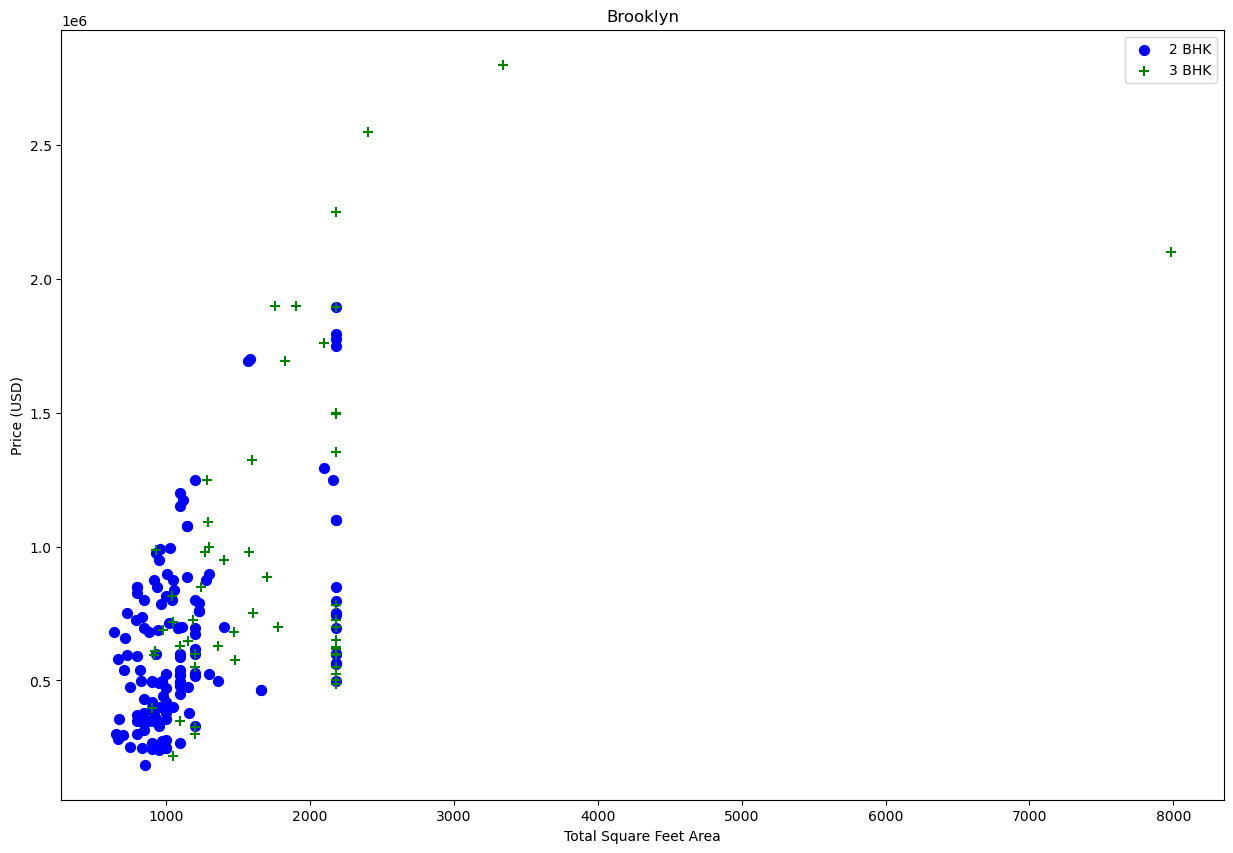

In [62]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (USD)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Brooklyn")
plt.show()

In [63]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(2389, 7)

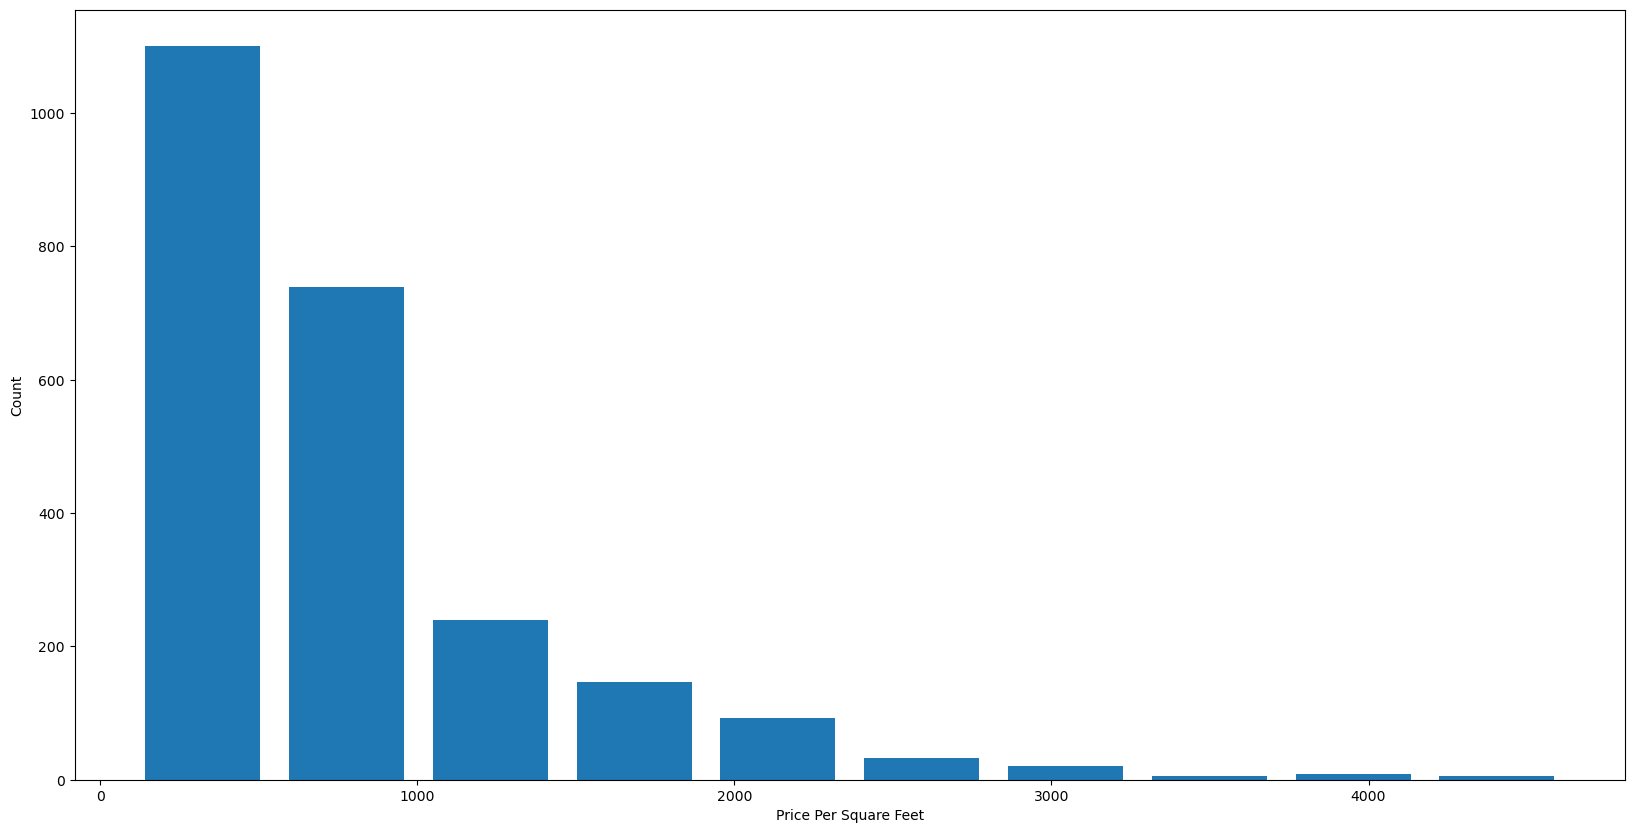

In [64]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

In [65]:
df8.bath.unique()

array([ 3,  2,  1,  6,  8,  4,  7,  5, 16, 50, 11,  9, 20, 10, 13, 43])

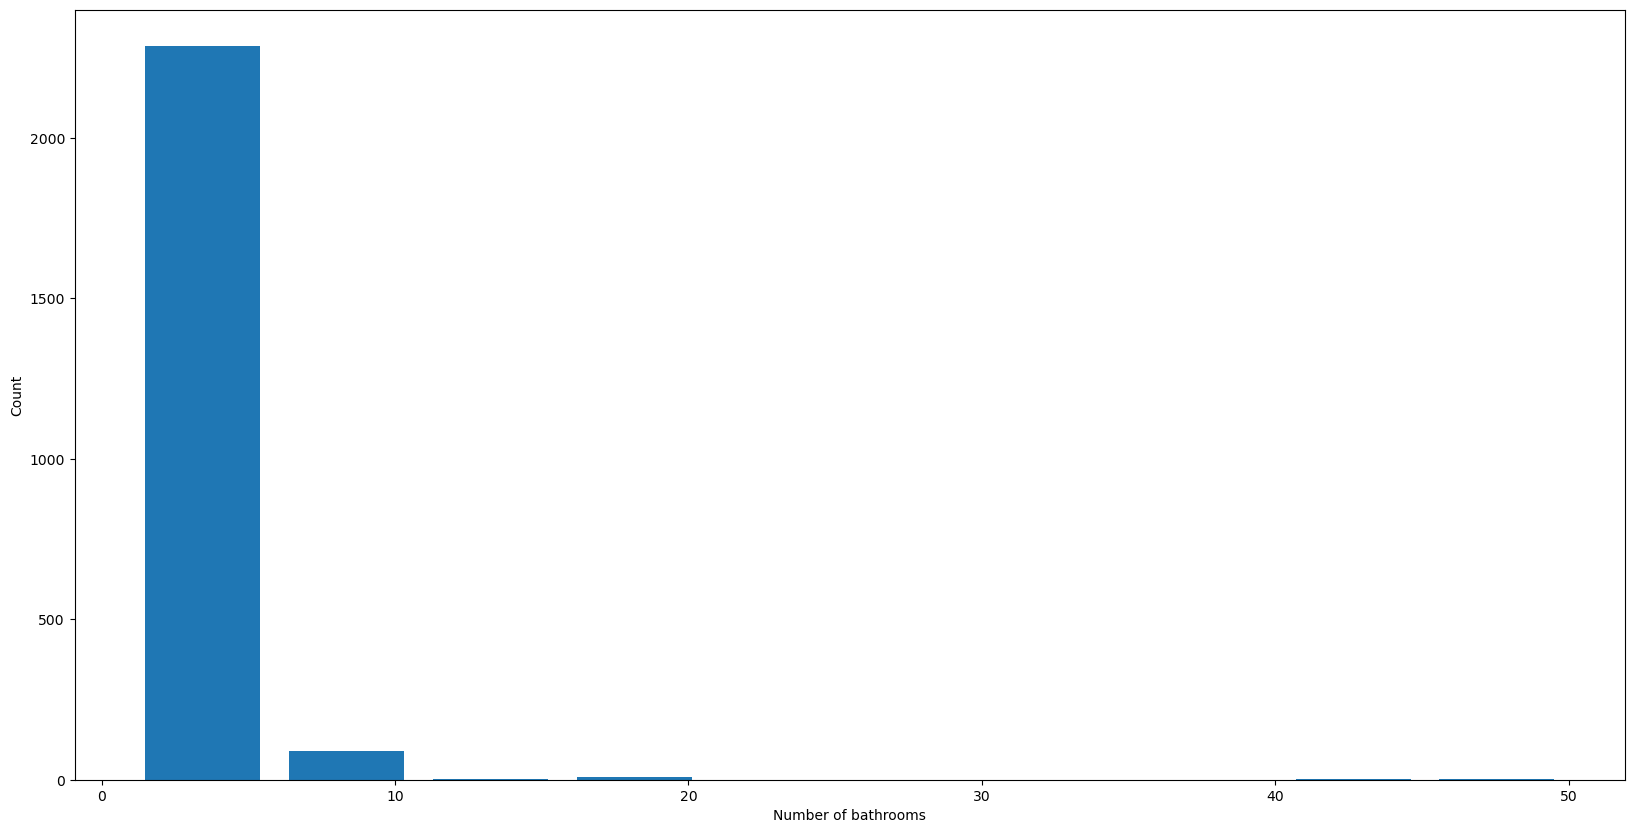

In [67]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

In [69]:
df8[df8.bath>df8.bhk+2]

,location,bed,total_sqft,bath,price,bhk,price_per_sqft
711,Kings County,3,2184.207862,7,2295000.0,3,1050.72
2189,New York County,10,8750.000000,13,29950000.0,10,3422.86
2221,New York County,3,6336.000000,6,8950000.0,3,1412.56
3397,Richmond County,8,33000.000000,16,16800000.0,8,509.09


In [70]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(2372, 7)

In [73]:
df10 = df9.drop(['bed','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,Bronx County,2837.000000,3,1100000.0,6
9,Bronx County,2184.207862,2,1249000.0,3
13,Bronx County,1638.000000,2,650000.0,3


In [74]:
dummies = pd.get_dummies(df10.location)
dummies

,Bronx County,Brooklyn,Coney Island,Flushing,Kings County,Manhattan,New York,New York County,Queens,Queens County,Richmond County,Riverdale,Staten Island,The Bronx
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False
9,True,False,False,False,False,False,False,False,False,False,False,False,False,False
13,True,False,False,False,False,False,False,False,False,False,False,False,False,False
16,True,False,False,False,False,False,False,False,False,False,False,False,False,False
17,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4012,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4013,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4015,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [76]:
df11 = pd.concat([df10,dummies],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,Bronx County,Brooklyn,Coney Island,Flushing,Kings County,Manhattan,New York,New York County,Queens,Queens County,Richmond County,Riverdale,Staten Island,The Bronx
0,Bronx County,2837.000000,3,1100000.0,6,True,False,False,False,False,False,False,False,False,False,False,False,False,False
9,Bronx County,2184.207862,2,1249000.0,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False
13,Bronx County,1638.000000,2,650000.0,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False
16,Bronx County,2184.207862,2,1300000.0,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False
17,Bronx County,2184.207862,2,1300000.0,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [80]:
df12 = df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,Bronx County,Brooklyn,Coney Island,Flushing,Kings County,Manhattan,New York,New York County,Queens,Queens County,Richmond County,Riverdale,Staten Island,The Bronx
0,2837.000000,3,1100000.0,6,True,False,False,False,False,False,False,False,False,False,False,False,False,False
9,2184.207862,2,1249000.0,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False
13,1638.000000,2,650000.0,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False
16,2184.207862,2,1300000.0,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False
17,2184.207862,2,1300000.0,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [83]:
df12.shape

(2372, 18)

In [85]:
X = df12.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,Bronx County,Brooklyn,Coney Island,Flushing,Kings County,Manhattan,New York,New York County,Queens,Queens County,Richmond County,Riverdale,Staten Island,The Bronx
0,2837.000000,3,6,True,False,False,False,False,False,False,False,False,False,False,False,False,False
9,2184.207862,2,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False
13,1638.000000,2,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False
16,2184.207862,2,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False
17,2184.207862,2,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [87]:
X.shape

(2372, 17)

In [90]:
y = df12.price
y.head()

0     1100000.0
9     1249000.0
13     650000.0
16    1300000.0
17    1300000.0
Name: price, dtype: float64

In [92]:
len(y)

2372

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [95]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.2005962248229506

In [96]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
dt_reg = DecisionTreeRegressor(random_state=10)
dt_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_reg.predict(X_test)
dt_r2 = dt_reg.score(X_test, y_test)  # R^2 Score
dt_mse = mean_squared_error(y_test, y_pred_dt)  # Mean Squared Error

print(f"Decision Tree - R^2: {dt_r2}, MSE: {dt_mse}")

Decision Tree - R^2: 0.7320250209194866, MSE: 1124288392893.4946


In [97]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)
rf_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_reg.predict(X_test)
rf_r2 = rf_reg.score(X_test, y_test)  # R^2 Score
rf_mse = mean_squared_error(y_test, y_pred_rf)  # Mean Squared Error

print(f"Random Forest - R^2: {rf_r2}, MSE: {rf_mse}")

Random Forest - R^2: 0.8266829601530947, MSE: 727151232025.9929


In [98]:
#Gradient Boosting Regression - Best for this model with the highest score and the lowest MSE
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_reg = GradientBoostingRegressor(random_state=10)
gb_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_reg.predict(X_test)
gb_r2 = gb_reg.score(X_test, y_test)  # R^2 Score
gb_mse = mean_squared_error(y_test, y_pred_gb)  # Mean Squared Error

print(f"Gradient Boosting - R^2: {gb_r2}, MSE: {gb_mse}")

Gradient Boosting - R^2: 0.8476402814434192, MSE: 639224839966.1865


In [99]:
#K Fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(GradientBoostingRegressor(), X, y, cv=cv)

array([0.914437  , 0.91104721, 0.88279398, 0.81204358, 0.87217881])

In [100]:
import pandas as pd

def predict_price(location, total_sqft, bath, bhk):
    # Create a dictionary to initialize the DataFrame
    feature_dict = {col: 0 for col in X.columns}  # Initialize all columns to 0
    feature_dict['total_sqft'] = total_sqft
    feature_dict['bath'] = bath
    feature_dict['bhk'] = bhk

    # Handle location encoding
    if location in X.columns:
        feature_dict[location] = 1

    # Convert to DataFrame
    input_df = pd.DataFrame([feature_dict])

    # Predict using the trained model
    return gb_reg.predict(input_df)[0]

<span style="font-size: 24px; font-weight: bold;">PREDICTION:-</span>

In [107]:
predicted_price = predict_price('The Bronx', 500, 1, 1)
print(f"Predicted Price: {predicted_price}")

Predicted Price: 216247.9057688788
